**** Cross-Validation ****

Cross-validation is a resampling technique used to evaluate a model's performance and its ability to generalize to unseen data. The dataset is split into k subsets (folds), and the model is trained on k–1 folds and tested on the remaining one. This process is repeated k times, with each fold used once as the test set. It helps reduce the risk of overfitting and gives a more reliable estimate of model performance.

**** Overfitting ****

Overfitting happens when a model learns the training data too well, including its noise and outliers. As a result, it performs excellently on training data but poorly on new, unseen data.
Characteristics:

Very high training accuracy, low testing accuracy

Complex model (e.g., too many parameters)

Poor generalization

**** Underfitting ****

Underfitting occurs when a model is too simple to capture the underlying patterns in the data. It performs poorly on both training and testing data.
Characteristics:

Low accuracy on both training and testing sets

Model fails to learn enough from the data

Usually caused by overly simplistic models or insufficient training

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

 1. Cross-Validation

In [6]:
# Generate synthetic dataset
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=500, n_features=10, random_state=42)

# Logistic Regression Model
model = LogisticRegression()

# Apply 5-Fold Cross-Validation
scores = cross_val_score(model, X, y, cv=5)

print("Cross-Validation Scores:", scores)
print("Average Accuracy:", np.mean(scores))

Cross-Validation Scores: [0.9  0.89 0.9  0.88 0.87]
Average Accuracy: 0.8879999999999999


 2. Overfitting and Underfitting

Polynomial Degree	Interpretation

1	Linear Regression (Underfitting)

3	Cubic Regression (Good Fit)

15	Very High-Degree Polynomial (Overfitting)

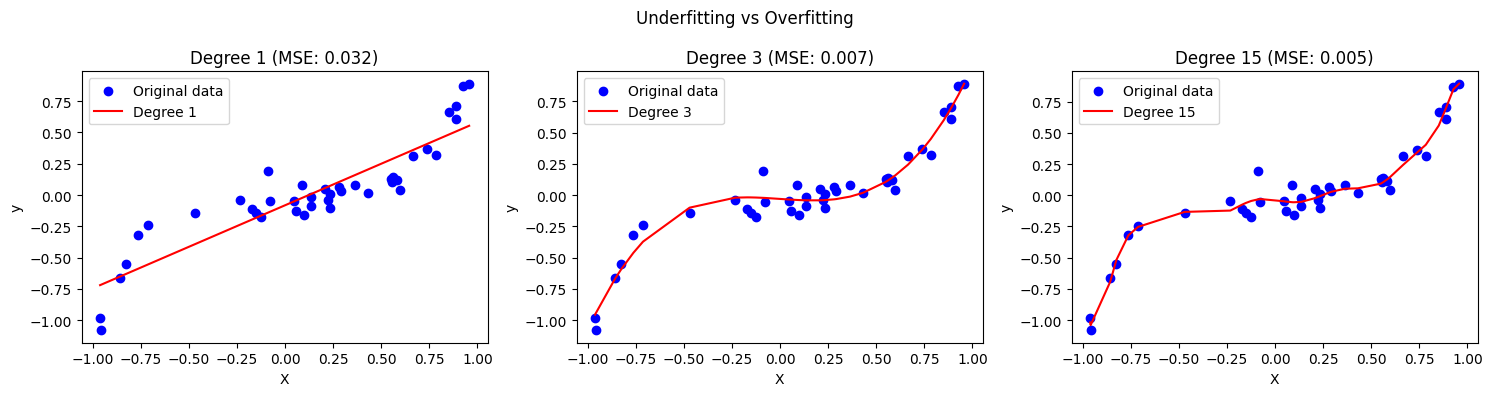

In [7]:
# Generate dataset
np.random.seed(0)
X = np.sort(np.random.rand(40, 1) * 2 - 1, axis=0)  # Range [-1, 1]
y = X**3 + np.random.normal(0, 0.1, X.shape)

# Degrees to test: Underfit (1), Good Fit (3), Overfit (15)
degrees = [1, 3, 15]

plt.figure(figsize=(15, 4))

for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    model = LinearRegression().fit(X_poly, y)
    y_pred = model.predict(X_poly)

    plt.subplot(1, 3, i+1)
    plt.scatter(X, y, color='blue', label='Original data')
    plt.plot(X, y_pred, color='red', label=f'Degree {degree}')
    plt.title(f"Degree {degree} (MSE: {mean_squared_error(y, y_pred):.3f})")
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.suptitle("Underfitting vs Overfitting")
plt.tight_layout()
plt.show()